### Data

In [49]:
europe_data_pilot = {
    "Akrotiri and Dhekelia_1": (640000, 720000),
    "Albania_1": (650000, 750000),
    "Andorra_1": (650000, 800000),
    "Austria_1": (650000, 800000),
    "Belarus_1": (650000, 800000),
    "Belgium_1": (650000, 800000),
    "Bosnia and Herzegovina_1": (650000, 900000),
    "Bulgaria_1": (650000, 750000),
    "Croatia_1": (500000, 650000),
    "Cyprus_1": (550000, 650000)}

africa_data_pilot = {
    "Algeria_1": (550000, 650000),
    "Angola_1": (550000, 650000),
    "Benin_1": (550000, 650000),
    "Botswana_1": (650000, 800000),
    "Burkina Faso_1": (550000, 650000),
    "Burundi_1": (550000, 650000),
    "Cabo Verde_1": (636000, 756000),
    "Cameroon_1": (650000, 800000),
    "Central African Republic_1": (650000, 900000),
    "Chad_1": (550000, 650000)}

middle_east_pilot = {
    "1_Bahrain": (595000, 605000),
    "2_Gaza_strip": (500000, 600000),
    "3_Iran": (600000, 650000),
    "4_Iraq": (550000, 650000),
    "5_Israel": (600000, 700000),
    "6_Kuwait": (650000, 750000),
    "7_Lebanon": (550000, 700000),
    "8_Oman": (550000, 650000),
    "9_Qatar": (500000, 650000),
    "10_Saudi_Arabia": (550000, 700000)}

asia_data_pilot = {
    "1_Brunei": (500000, 650000),
    "2_Burma": (450000, 550000),
    "3_Cambodia": (550000, 700000),
    "4_China": (450000, 600000),
    "5_Hong_Kong": (550000, 650000),
    "6_Indonesia": (550000, 700000),
    "7_Japan": (550000, 650000),
    "8_North_Korea": (450000, 600000),
    "9_South_Korea": (550000, 650000),
    "10_Laos": (550000, 650000)}

south_america_pilot = {
    "1_Argentina": (550000, 700000),
    "2_Bolivia": (550000, 650000),
    "3_Brazil": (500000, 650000),
    "4_Chile": (550000, 650000),
    "5_Colombia": (500000, 600000),
    "6_Ecuador": (550000, 650000),
    "7_Falkland_Islands": (550000, 650000),
    "8_Guyana": (550000, 650000),
    "9_Paraguay": (550000, 700000),
    "10_Peru": (500000, 600000),}


In [50]:
import numpy as np


# Saml alle data (globalt)
all_data = {**europe_data_pilot, **africa_data_pilot, **middle_east_data_pilot, **asia_data_pilot, **south_america_data_pilot}

# Beregn median for hvert land
median_salaries = [(min_s + max_s) / 2 for (min_s, max_s) in all_data.values()]

# Beregn 25. og 75. percentil
p25 = np.percentile(median_salaries, 25)
p75 = np.percentile(median_salaries, 75)

# Kategoriser hvert land
categorized = {}
for country, (min_s, max_s) in all_data.items():
    median = (min_s + max_s) / 2
    if median < p25:
        cat = 1  # Lav
    elif median <= p75:
        cat = 2  # Mellem
    else:
        cat = 3  # Høj
    categorized[country] = cat

# Print grænser
print("Global kategorisering baseret på median:")
print(f"- Lav (1): Median < {p25:.0f}")
print(f"- Mellem (2): {p25:.0f} ≤ Median ≤ {p75:.0f}")
print(f"- Høj (3): Median > {p75:.0f}\n")

# Eksempel på output
print("Eksempel på kategorisering (første 5 lande):")
for country in list(categorized.keys())[:5]:
    print(f"{country}: {all_data[country]} → Median = {(all_data[country][0] + all_data[country][1]) / 2:.0f} → Kategori {categorized[country]}")

Global kategorisering baseret på median:
- Lav (1): Median < 600000
- Mellem (2): 600000 ≤ Median ≤ 672500
- Høj (3): Median > 672500

Eksempel på kategorisering (første 5 lande):
Akrotiri and Dhekelia_1: (640000, 720000) → Median = 680000 → Kategori 3
Albania_1: (650000, 750000) → Median = 700000 → Kategori 3
Andorra_1: (650000, 800000) → Median = 725000 → Kategori 3
Austria_1: (650000, 800000) → Median = 725000 → Kategori 3
Belarus_1: (650000, 800000) → Median = 725000 → Kategori 3


In [51]:
import numpy as np
from scipy import stats

#kruskal på ordinal data:


# Opret en dictionary med de kategoriserede data (fra tidligere)
categorized_data = {
    "Europe": [categorized[country] for country in europe_data_pilot.keys()],
    "Africa": [categorized[country] for country in africa_data_pilot.keys()],
    "Middle East": [categorized[country] for country in middle_east_data_pilot.keys()],
    "Asia": [categorized[country] for country in asia_data_pilot.keys()],
    "South America": [categorized[country] for country in south_america_data_pilot.keys()],
}

# Udfør Kruskal-Wallis på de ordinale kategorier
statistic, p_value = stats.kruskal(*categorized_data.values())


print("Kruskal-Wallis Test på Ordinale Kategorier (1=lav, 2=mellem, 3=høj):")
print(f"Test-statistik: {statistic:.3f}")
print(f"P-værdi: {p_value:.5f}")

if p_value < 0.05:
    print("\nKonklusion: Signifikant forskel i lønintervalfordeling mellem regioner (p < 0.05).")
    print("Brug post-hoc test (f.eks. Dunn's test) for at finde hvilke regioner der adskiller sig.")
else:
    print("\nKonklusion: Ingen signifikant forskel i lønintervalfordeling (p > 0.05).")

Kruskal-Wallis Test på Ordinale Kategorier (1=lav, 2=mellem, 3=høj):
Test-statistik: 19.659
P-værdi: 0.00058

Konklusion: Signifikant forskel i lønintervalfordeling mellem regioner (p < 0.05).
Brug post-hoc test (f.eks. Dunn's test) for at finde hvilke regioner der adskiller sig.


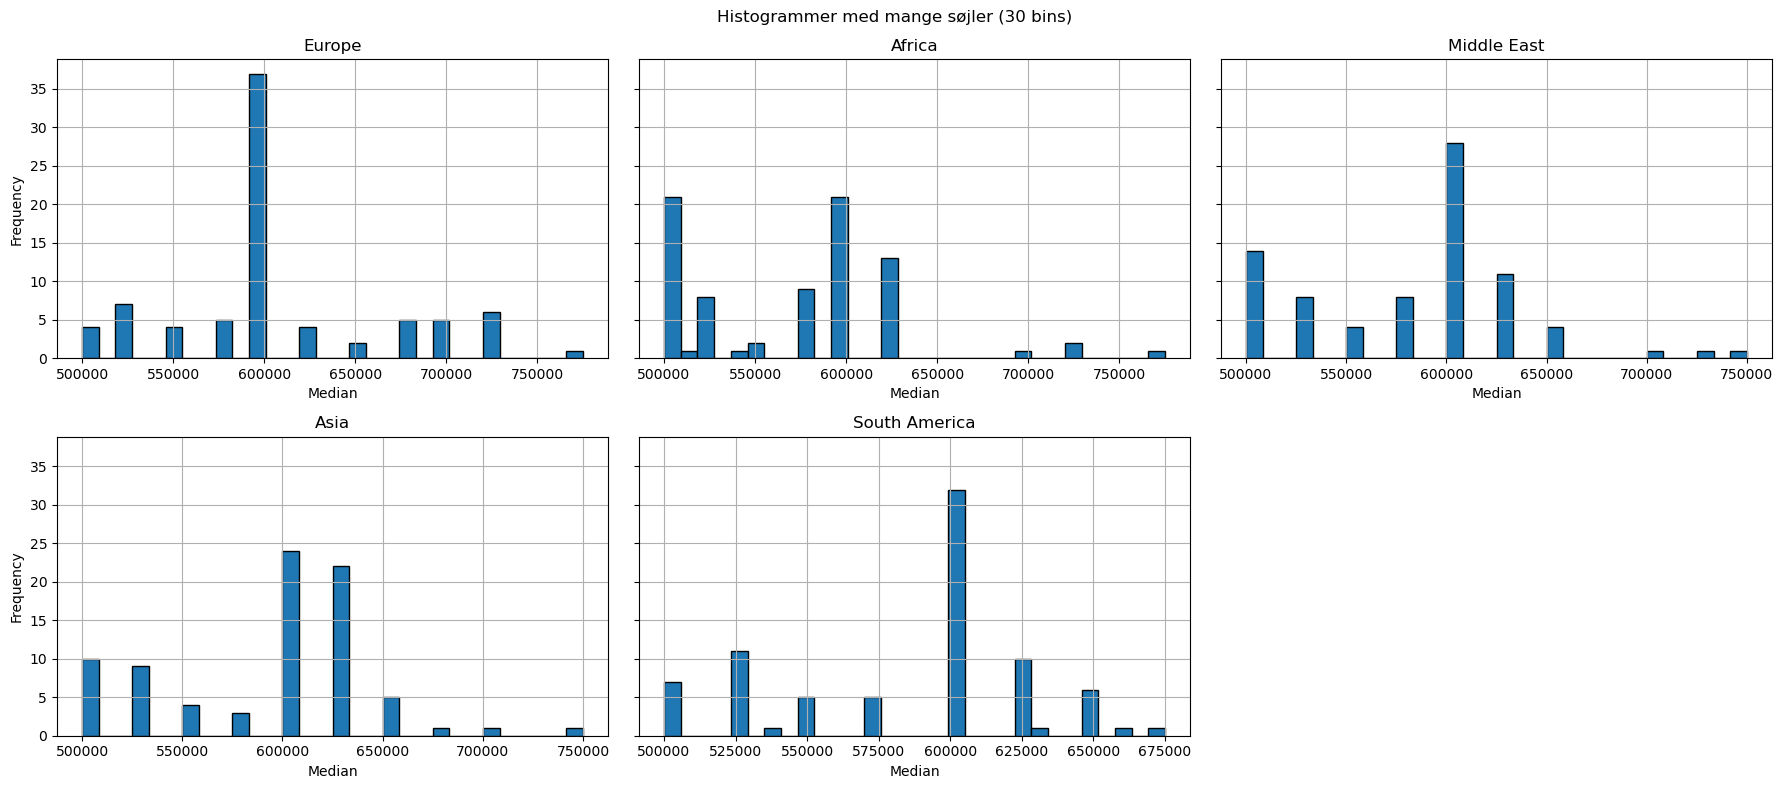

/var/folders/13/bmwvm7vd0pv3v3_xymz6s4wh0000gn/T/ipykernel_99905/3689181690.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(region_data, labels=region_names)


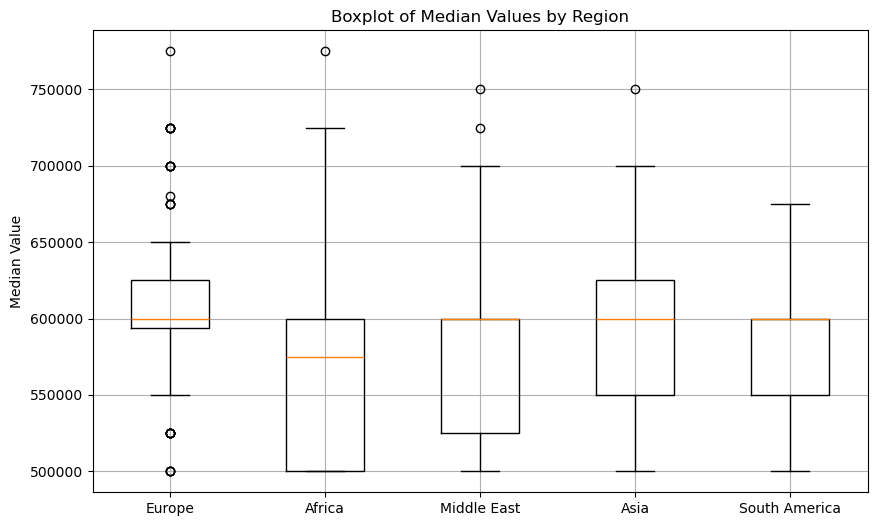

In [52]:
# Function to calculate median from (min, max) range
def median_from_range(region_dict):
    return [np.median([low, high]) for low, high in region_dict.values()]

region_names = ["Europe", "Africa", "Middle East", "Asia", "South America"]
region_data = [
    median_from_range(europe_data),
    median_from_range(africa_data),
    median_from_range(middle_east_data),
    median_from_range(asia_data),
    median_from_range(south_america_data)
]

# Tegn 3 top og 2 bund, med 30 bins (søjler)
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for i, (name, data) in enumerate(zip(region_names, region_data)):
    axes[i].hist(data, bins=30, edgecolor='black')  # 🔥 Flere søjler her
    axes[i].set_title(name)
    axes[i].set_xlabel("Median")
    axes[i].grid(True)

# Fjern ubrugt subplot
fig.delaxes(axes[-1])
axes[0].set_ylabel("Frequency")
axes[3].set_ylabel("Frequency")

fig.suptitle("Histogrammer med mange søjler (30 bins)")
plt.tight_layout()
plt.show()

# Boxplot comparing all regions
plt.figure(figsize=(10, 6))
plt.boxplot(region_data, labels=region_names)
plt.title("Boxplot of Median Values by Region")
plt.ylabel("Median Value")
plt.grid(True)
plt.show()

### Summary statiscs

### Kruskal-Wallis Test

In [53]:
import numpy as np
from scipy import stats

#kruskal på ordinal data:


# Opret en dictionary med de kategoriserede data (fra tidligere)
categorized_data = {
    "Europe": [categorized[country] for country in europe_data_pilot.keys()],
    "Africa": [categorized[country] for country in africa_data_pilot.keys()],
    "Middle East": [categorized[country] for country in middle_east_pilot.keys()],
    "Asia": [categorized[country] for country in asia_data_pilot.keys()],
    "South America": [categorized[country] for country in south_america_pilot.keys()],
}

# Udfør Kruskal-Wallis på de ordinale kategorier
statistic, p_value = stats.kruskal(*categorized_data.values())


print("Kruskal-Wallis Test på Ordinale Kategorier (1=lav, 2=mellem, 3=høj):")
print(f"Test-statistik: {statistic:.3f}")
print(f"P-værdi: {p_value:.5f}")

if p_value < 0.05:
    print("\nKonklusion: Signifikant forskel i lønintervalfordeling mellem regioner (p < 0.05).")
    print("Brug post-hoc test (f.eks. Dunn's test) for at finde hvilke regioner der adskiller sig.")
else:
    print("\nKonklusion: Ingen signifikant forskel i lønintervalfordeling (p > 0.05).")

Kruskal-Wallis Test på Ordinale Kategorier (1=lav, 2=mellem, 3=høj):
Test-statistik: 19.659
P-værdi: 0.00058

Konklusion: Signifikant forskel i lønintervalfordeling mellem regioner (p < 0.05).
Brug post-hoc test (f.eks. Dunn's test) for at finde hvilke regioner der adskiller sig.


In [56]:
from scipy.stats import norm

z_oneminusbeta = norm.ppf(0.95)
print(round(z_oneminusbeta, 4))  # Output: 3.0902

z_oneminusalpha = norm.ppf(0.975)
print(round(z_oneminusalpha, 4))  # Output: 3.0902

1.6449
1.96
